In [160]:
import pandas as pd
import seaborn as sns

transactions = pd.read_csv("C:\\Users\\palej\\Desktop\\FIUBA\\Organizacion de datos\\TP\\transactions_train.csv")

In [317]:
def tipo_transferencia(numero) -> str:
    if numero == 0:
        return "Legal"
    else:
        return "Fraude"
    
def redondeo(numero) -> int:
    return round(numero)

In [318]:
analisis = transactions[ ["target", "ammount", "product_category", "feat_card_4"] ]

In [319]:
analisis = analisis.rename(columns={"target":"Transaccion", "ammount":"Monto", "product_category":"Tipo de producto", "feat_card_4":"Tarjeta"})

In [320]:
analisis.Transaccion = analisis.Transaccion.map(tipo_transferencia)

In [321]:
analisis.Tarjeta = analisis.Tarjeta.fillna("Otra")

In [322]:
analisis.Monto = analisis.Monto.fillna(0)

In [323]:
analisis.Monto = analisis.Monto.map(redondeo)

In [324]:
analisis = analisis[ analisis.Transaccion == "Fraude"]

In [325]:
analisis = analisis.pivot_table(values="Monto", index="Tarjeta", columns="Tipo de producto", aggfunc=sum)

C:\Users\palej\AppData\Local\Temp\ipykernel_11284\3352054780.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [326]:
analisis = analisis.fillna(0)

In [327]:
analisis = analisis.stack().reset_index()

In [328]:
analisis = analisis.rename(columns={0:"Monto"})

In [329]:
analisis

,Tarjeta,Tipo de producto,Monto
0,Otra,C,291.0
1,Otra,H,300.0
2,Otra,R,250.0
3,Otra,S,0.0
4,Otra,W,3723.0
5,american express,C,156.0
6,american express,H,14338.0
7,american express,R,20550.0
8,american express,S,2575.0
9,american express,W,0.0


Text(0.5, 1.0, 'Relacion de Fraudes')

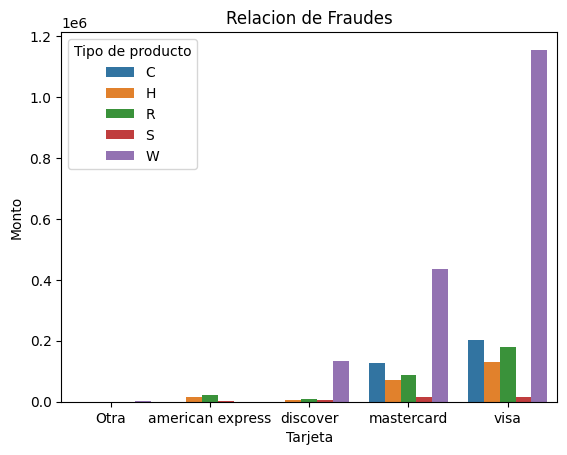

In [330]:
bar = sns.barplot(analisis, x="Tarjeta", y="Monto", hue="Tipo de producto")
bar.set_title("Relacion de Fraudes")